In [4]:
#Import Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 
from matplotlib.transforms import Bbox
import scipy

In [6]:
#Set default fonts and plot colors
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'image.cmap': 'viridis'})
plt.rcParams.update({'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif',
                                    'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook',
                                    'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman',
                                    'Nimbus Roman No9 L', 'Palatino', 'Charter', 'serif']})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'mathtext.rm': 'serif'})
plt.rcParams.update({'mathtext.fontset': 'custom'})
cc = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.close('all')

In [8]:
df = pd.DataFrame()
# import required module
import os
# assign directory where the data file is
directory = 'C:/Users/DRH6/Desktop/NMR Test/'
# iterate over files in
# that directory

#Capturing arrays for X and Y datapoints
Y = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    data = pd.read_csv(f, header=None)
    # checking if it is a file
    df[filename] = data[0].values
    X = data[1].values
    Y.append(data[0].values)

In [9]:
X[7900]

5.925

In [10]:
#After 5.8 seconds the data jumps unphysically on enough samples to disclude the data from fitting
j = 0
for i in X:
    if i >= 5.8:
        break;
    j = j + 1
length = j      

In [11]:
df

,01.csv,02.csv,03.csv,04.csv,05.csv,06.csv,07.csv,08.csv,09.csv,10.csv,...,86.csv,87.csv,88.csv,89.csv,90.csv,91.csv,92.csv,93.csv,94.csv,95.csv
0,0.306532,0.291971,0.315789,0.290140,0.296950,0.287266,0.270771,0.274433,0.275203,0.300492,...,0.262387,0.256997,0.329991,0.237713,0.263927,0.269556,0.285777,0.277786,0.295770,0.292724
1,0.218579,0.195514,0.251586,0.224829,0.231570,0.211855,0.213382,0.214408,0.210764,0.209921,...,0.231296,0.223819,0.988960,1.146465,0.232528,0.205027,0.246200,0.211204,0.232576,0.240297
2,0.232439,0.231874,0.259581,0.229603,0.234171,0.227840,0.203338,0.212834,0.207872,0.232751,...,0.240879,0.238654,0.354733,0.244386,0.239475,0.243976,0.254995,0.248407,0.267759,0.232186
3,0.208604,0.199620,0.216013,0.190398,0.196010,0.186496,0.197366,0.177890,0.182493,0.197122,...,0.195757,0.189786,0.985247,1.146653,0.194714,0.199933,0.207957,0.203885,0.224623,0.183523
4,0.215828,0.196853,0.245601,0.206914,0.216410,0.206794,0.187596,0.198683,0.193824,0.217385,...,0.223956,0.224332,0.336972,0.228833,0.229688,0.225359,0.241067,0.232220,0.263584,0.218463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
#Calculating T2 Times (curve_fit parameters)
#Calculating curve_fit covariance
#Calculating Concentration in an array
#Here we drop the first spin echo

parameters = []
covariance = []
M0s = []
for column in df.columns:
    y = df[column].values
    M0 = y[1]
    M0s.append(M0)
    def T2(t, R2):
        M = M0*np.exp(-1*t/R2)
        return M
    c = curve_fit(T2, X[1:length], y[1:length])
    parameters.append(c[0])
    covariance.append(c[1])

In [13]:
Larmor = [0]*94
Larmor[0:10] = [27.677]*10
Larmor[10:19] = [27.682]*9
Larmor[19:31] = [27.677]*12
Larmor[31:32] = [27.672]*1
Larmor[32:33] = [27.672]*1
Larmor[33:36] = [27.667]*3
Larmor[36:43] = [27.662]*7
Larmor[43:47] = [27.657]*4
Larmor[47:60] = [27.652]*13
Larmor[60:73] = [27.647]*13
Larmor[73:84] = [27.642]*11
Larmor[84:95] = [27.637]*11

In [14]:
j = 0
k = []
i = 0
while i < 95:
    parameters[i] = parameters[i][0]
    i = i + 1
for i in parameters:
    if i > 2.5:
        k.append(j)
    j = j + 1
j = 0
for i in k:
    print(i)
    Larmor.pop(i-j)
    parameters.pop(i-j)
    Y.pop(i-j)
    j = j + 1

18
28
35
47
49
51
53
60
76
80
84
87
88


<Figure size 650x480 with 0 Axes>

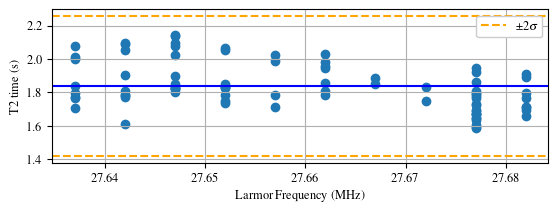

In [15]:
#Same plot but shorter

plt.rcParams.update({'font.size': 9})  # increase the font size
plt.rcParams['font.family'] = 'Serif'

plt.figure().set_figwidth(6.5)
plt.figure().set_figheight(2)

plt.xlabel('Larmor Frequency (MHz)')
plt.ylabel('T2 time (s)')
plt.scatter(Larmor,parameters, marker='o')
mean = np.mean(parameters)
sd = np.std(parameters)
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*3, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*3, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

plt.grid()
plt.legend(facecolor="white",framealpha=1)
#plt.savefig('CopperDetectionLimit_Updated.png', bbox_inches='tight', dpi=3000)

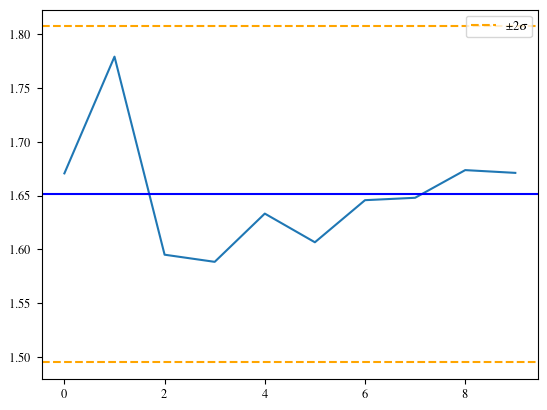

In [16]:
mean = np.mean(parameters[0:10])
sd = np.std(parameters[0:10])
plt.plot(range(10),parameters[0:10])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*3, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*3, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

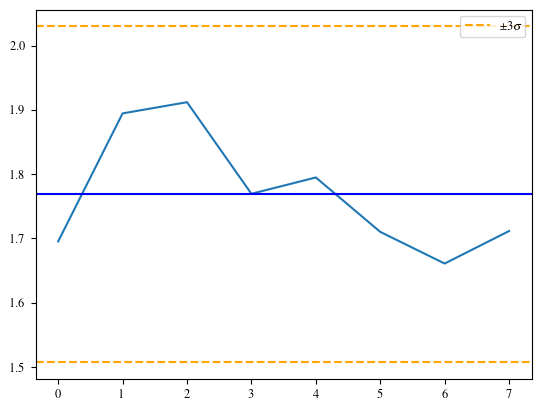

In [17]:
mean = np.mean(parameters[10:18])
sd = np.std(parameters[10:18])
plt.plot(range(8),parameters[10:18])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*3, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*3, color = 'orange', linestyle = '--',label='±3'+ r'$\sigma$')
plt.legend()

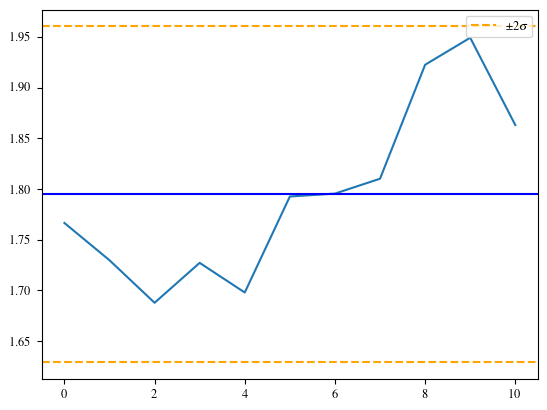

In [18]:
mean = np.mean(parameters[18:29])
sd = np.std(parameters[18:29])
plt.plot(range(11),parameters[18:29])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*2, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*2, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

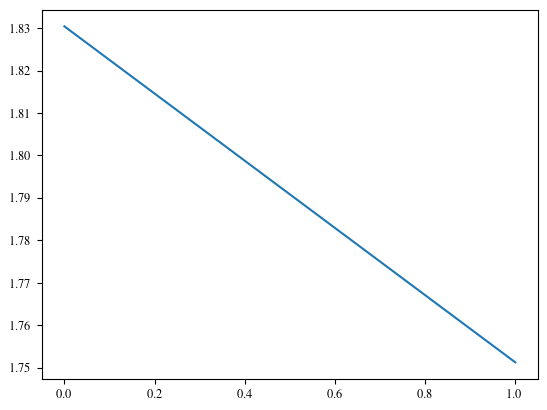

In [19]:
plt.plot(range(2),parameters[29:31])

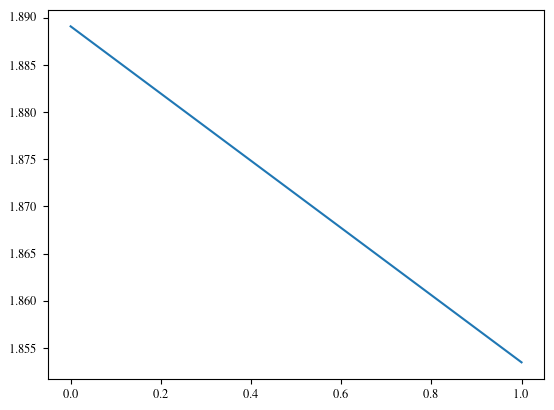

In [20]:
plt.plot(range(2),parameters[31:33])

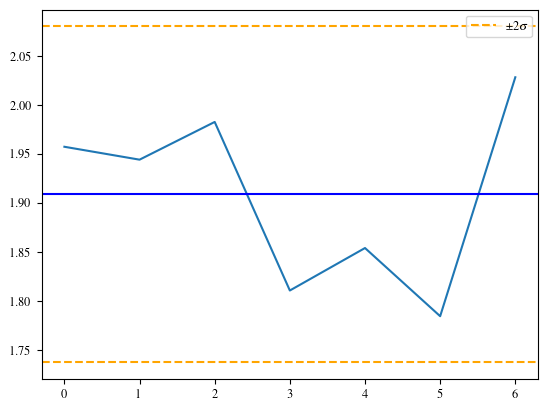

In [21]:
mean = np.mean(parameters[33:40])
sd = np.std(parameters[33:40])
plt.plot(range(7),parameters[33:40])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*2, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*2, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

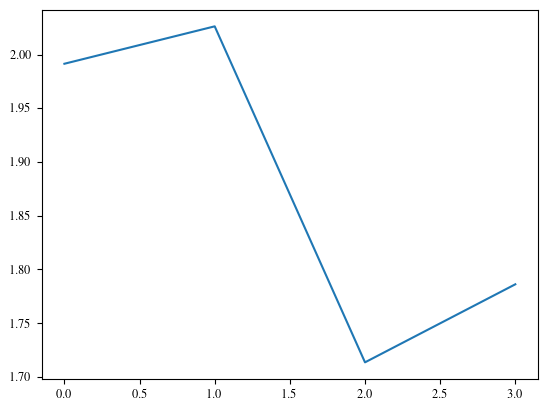

In [22]:
plt.plot(range(4),parameters[40:44])

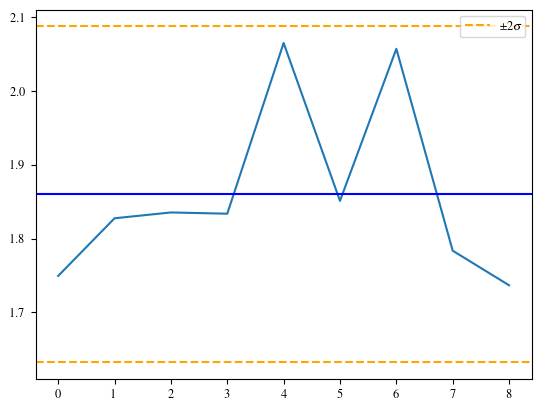

In [23]:
mean = np.mean(parameters[44:53])
sd = np.std(parameters[44:53])
plt.plot(range(9),parameters[44:53])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*2, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*2, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

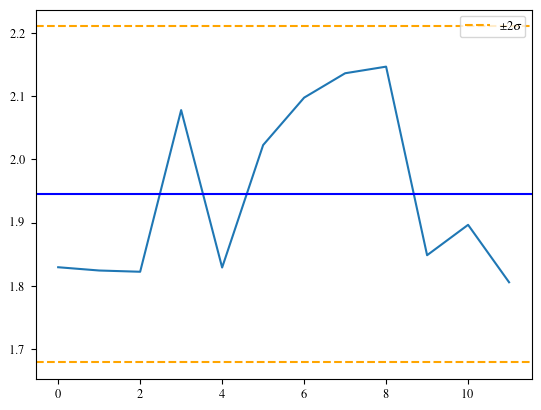

In [24]:
mean = np.mean(parameters[53:65])
sd = np.std(parameters[53:65])
plt.plot(range(12),parameters[53:65])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*2, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*2, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

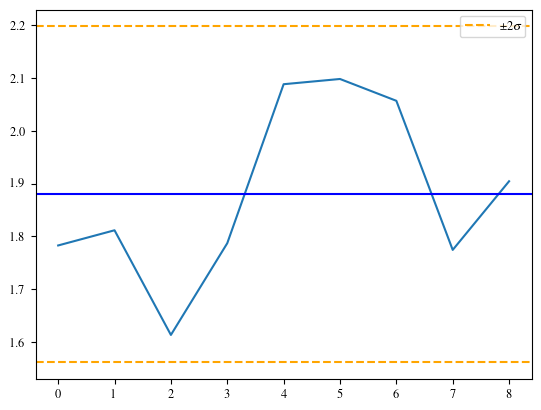

In [25]:
mean = np.mean(parameters[65:74])
sd = np.std(parameters[65:74])
plt.plot(range(9),parameters[65:74])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*2, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*2, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

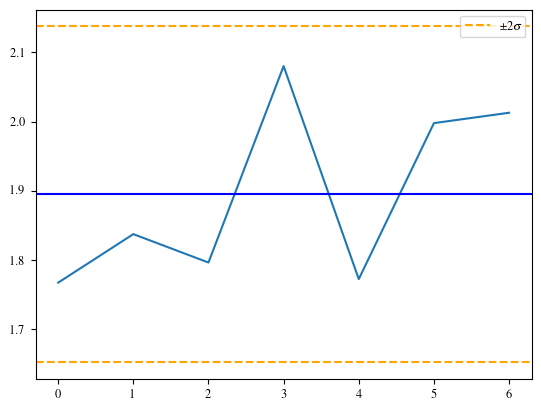

In [26]:
mean = np.mean(parameters[74:81])
sd = np.std(parameters[74:81])
plt.plot(range(7),parameters[74:81])
plt.axhline(y = mean, color = 'blue')
plt.axhline(y = mean+sd*2, color = 'orange', linestyle = '--')
plt.axhline(y = mean-sd*2, color = 'orange', linestyle = '--',label='±2'+ r'$\sigma$')
plt.legend()

In [27]:
Larmor[74:81]

[27.637, 27.637, 27.637, 27.637, 27.637, 27.637, 27.637]

In [28]:
j = 0
k = []
for i in parameters:
    if i > 2.5:
        k.append(j)
    j = j + 1

In [29]:
k = 0
j = 0
temp1 = []
temp2 = []
for i in Larmor:
    if i == j:
        j = i
        k = k + 1
    if i != j:
        j = i
        temp1.append(k)
        temp2.append(i)
        k = k + 1
temp1.append(len(Larmor)-1)

In [30]:
means = []
j = 0
i = 0
while i < len(temp1)-1:
    print(temp1[i])
    print(temp1[i+1])
    print('*************')
    means.append(np.mean(parameters[temp1[i]:temp1[i+1]]))
    j = i
    i = i + 1


0
10
*************
10
18
*************
18
29
*************
29
31
*************
31
33
*************
33
40
*************
40
44
*************
44
53
*************
53
65
*************
65
74
*************
74
81
*************


In [31]:
a = np.mean(parameters[0:10]+parameters[18:29])
means[0] = a
means.pop(2)

1.7947241399454712

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

<Figure size 650x480 with 0 Axes>

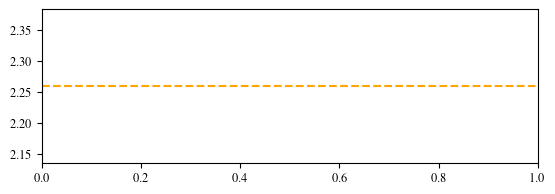

In [33]:
plt.rcParams.update({'font.size': 9})  # increase the font size
plt.rcParams['font.family'] = 'Serif'

plt.figure().set_figwidth(6.5)
plt.figure().set_figheight(2)
plt.axhline(y = mean+sd*3, color = 'orange', linestyle = '--',label='+3'+ r'$\sigma$ of highest Larmor point')
plt.plot(temp2,means,'o', label='Averaged T2 Data')
plt.xlabel('Larmor Frequency (MHz)')
plt.grid()
plt.ylabel('T2 time (s)')
plt.legend()

In [34]:
a = np.log(Y[0])
b = np.log(Y[15])
c = np.log(Y[30])
d = np.log(Y[45])
e = np.log(Y[60])
f = np.log(Y[75])

C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\2525087792.py:1: RuntimeWarning: divide by zero encountered in log
  a = np.log(Y[0])
C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\2525087792.py:2: RuntimeWarning: divide by zero encountered in log
  b = np.log(Y[15])
C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\2525087792.py:3: RuntimeWarning: divide by zero encountered in log
  c = np.log(Y[30])
C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\2525087792.py:4: RuntimeWarning: divide by zero encountered in log
  d = np.log(Y[45])
C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\2525087792.py:5: RuntimeWarning: divide by zero encountered in log
  e = np.log(Y[60])
C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\2525087792.py:6: RuntimeWarning: divide by zero encountered in log
  f = np.log(Y[75])


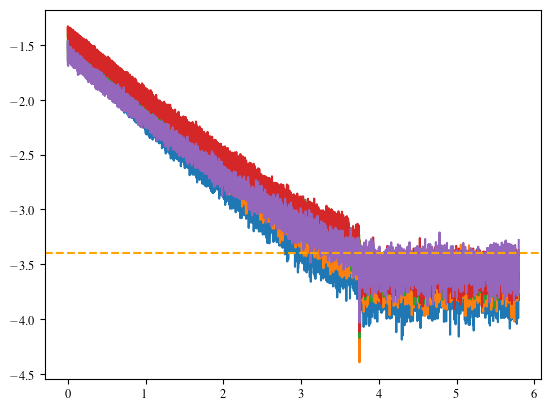

In [36]:
plt.plot(X[1:length],a[1:length])
plt.plot(X[1:length],b[1:length])
plt.plot(X[1:length],c[1:length])
plt.plot(X[1:length],d[1:length])
plt.plot(X[1:length],e[1:length])
plt.axhline(y = -3.4, color = 'orange', linestyle = '--',label='noise floor')

In [38]:
log_plots = []
for i in Y:
    log_plots.append(np.log(i))

C:\Users\DRH6\AppData\Local\Temp\ipykernel_28892\1212514919.py:3: RuntimeWarning: divide by zero encountered in log
  log_plots.append(np.log(i))


In [40]:
temp2 = []
for i in log_plots:
    temp = []
    for j in i:
        temp.append(j+1)
        if j < -3.4:
            break;
    temp2.append(temp)

In [42]:
mean = []
amp = []
rms = []
kurtosis = []
std = []
shape_factor = []
skewness = []
crest_factor = []
impulse_factor = []
for i in temp2:
    m = np.mean(i)
    mean.append(m)
    s = np.std(i)
    std.append(s)
    amp.append(i[0])
    r = np.sqrt(np.mean(np.array(i)**2))
    rms.append(r)
    shape_factor.append(r/m)
    kurtosis.append(scipy.stats.kurtosis(i))
    skewness.append(scipy.stats.skew(i))
    impulse_factor.append(i[0]/m)
    crest_factor.append(i[0]/r)   

In [45]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.inspection import PartialDependenceDisplay
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [184]:
X = [mean ,amp ,rms ,kurtosis, std, shape_factor, skewness, crest_factor, impulse_factor]
features=['Mean' ,'Amplitude' ,'RMS' ,'Kurtosis', 'Standard Deviation', 'Shape Factor', 
          'Skewness', 'Crest Factor', 'Impulse Factor']
X = np.array(X).transpose()
Y = parameters

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [188]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [190]:
y_pred = rf.predict(X_test)

In [191]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01729344805641539


In [194]:
my_plots = PartialDependenceDisplay(rf, features=[1],feature_names='mean',target_idx = 1,deciles=1)
plt.show()

In [196]:
import pandas as pd

df = pd.DataFrame(X, columns=['Mean' ,'Amplitude' ,'RMS' ,'Kurtosis', 
                              'Standard Deviation', 'Shape Factor', 'Skewness', 'Crest Factor', 'Impulse Factor'])

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/DRH6/AppData/Local/anaconda3/pkgs/sphinx-7.3.7-py312h827c3e9_0/Lib/site-packages/sphinx/templates/graphviz'
#for i in range(3):
#    tree = rf.estimators_[i]
#    dot_data = export_graphviz(tree,
#                               feature_names=df.columns,  
#                               filled=True,  
#                               max_depth=2, 
#                               impurity=False, 
#                               proportion=True)
#    graph = graphviz.Source(dot_data)
#    display(graph)

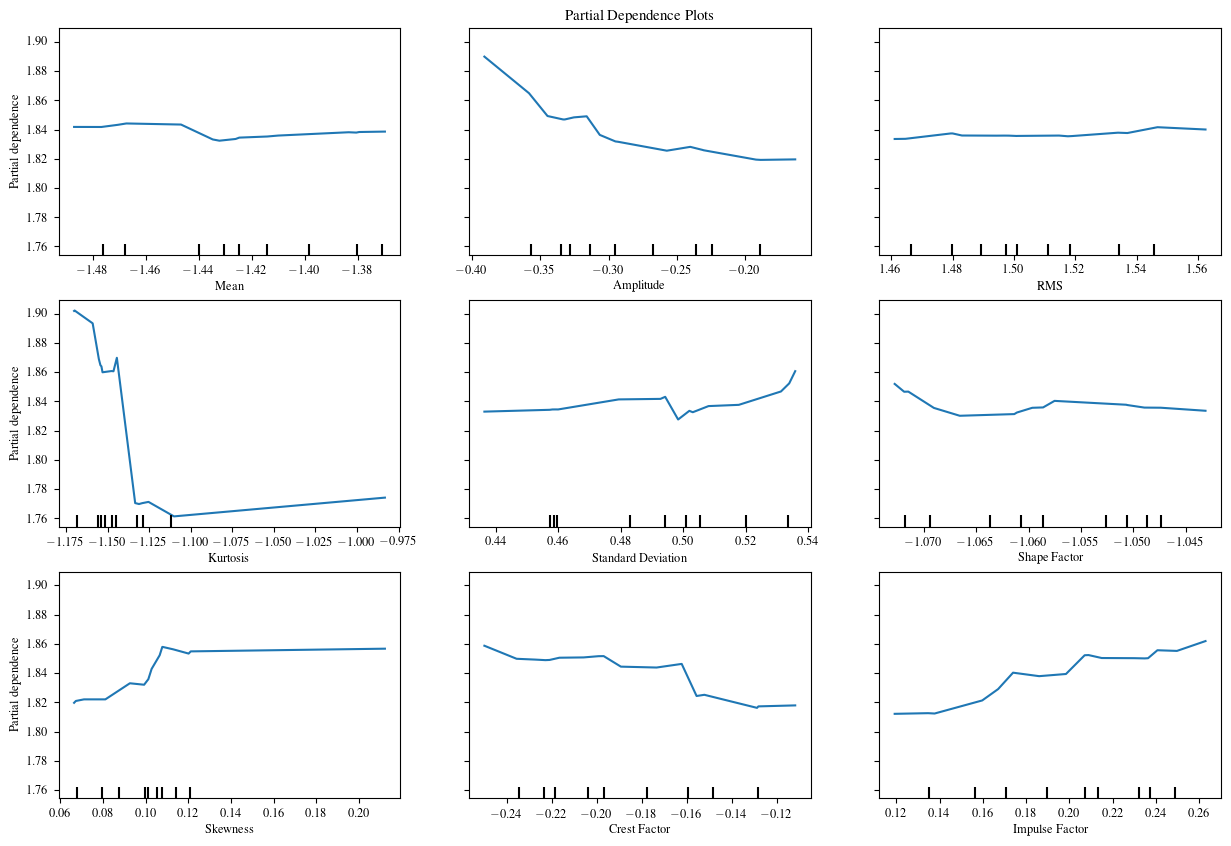

In [198]:
from sklearn.inspection import partial_dependence
#results = partial_dependence(estimator=rf,X=X_test,features=(0,1,2,3,4,5,6,7,8))
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
a = PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0,1,2,3,4,5,6,7,8), # the features to plot
    random_state=5,
    ax=ax,
    feature_names=(['Mean' ,'Amplitude' ,'RMS' ,'Kurtosis', 
                              'Standard Deviation', 'Shape Factor', 'Skewness', 'Crest Factor', 'Impulse Factor'])
)
plt.show()

In [200]:
independent = []
dependent = []
j = 0
for i in a.pd_results:
    independent.append(a.pd_results[j]['grid_values'][0])
    dependent.append(a.pd_results[j]['average'][0])
    j = j + 1

In [202]:
ind = []
for i in independent:
    temp = []
    for j in i:
        min_val = np.min(i)
        max_val = np.max(i)
        j = (j - min_val) / (max_val - min_val)
        temp.append(j)
    ind.append(temp)

Text(0, 0.5, 'T2 time (s)')

<Figure size 650x480 with 0 Axes>

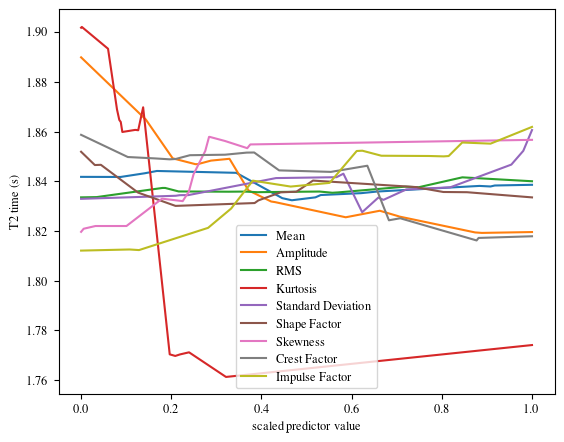

In [204]:

plt.rcParams.update({'font.size': 9})  # increase the font size
plt.rcParams['font.family'] = 'Serif'

plt.figure().set_figwidth(6.5)
plt.figure().set_figheight(5)

#plt.xlabel('Larmor Frequency (MHz)')
#plt.ylabel('T2 time (s)')

j = 0
for i in ind:
    plt.plot(ind[j],dependent[j],label=features[j])
    j = j + 1
plt.legend()
plt.xlabel('scaled predictor value')
plt.ylabel('T2 time (s)')

In [156]:
ind = []
for i in independent:
    temp = []
    for j in i:
        min_val = np.min(i)
        max_val = np.max(i)
        j = (j - min_val) / (max_val - min_val)
        temp.append(j)
    ind.append(temp)

In [182]:
len(independent[1])

17

In [160]:
columns=['Mean' ,'Amplitude' ,'RMS' ,'Kurtosis', 
                              'Standard Deviation', 'Shape Factor', 'Skewness', 'Crest Factor', 'Impulse Factor']

Text(0, 0.5, 'Parameter Value (normalized)')

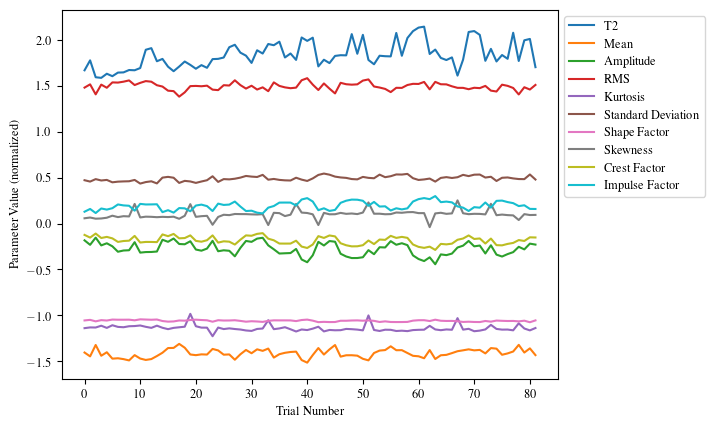

In [214]:

plt.plot(np.arange(len(Y)), Y, label='T2')
for i in columns:
    plt.plot(np.arange(len(Y)), df[i], label=i)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

plt.xlabel('Trial Number')
plt.ylabel('Parameter Value (normalized)')

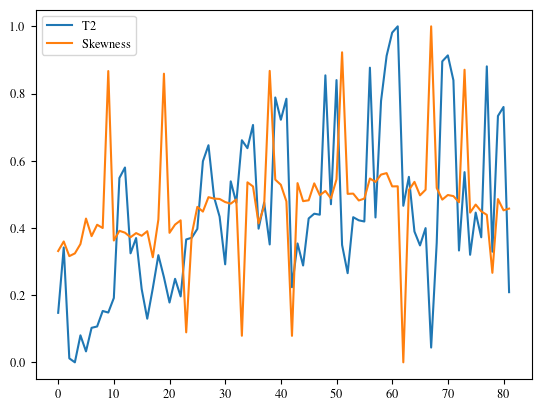

In [216]:
y1_norm = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))
y2_norm = (df['Skewness'] - np.min(df['Skewness'])) / (np.max(df['Skewness']) - np.min(df['Skewness']))
plt.plot(np.arange(len(Y)), y1_norm, label='T2')
plt.plot(np.arange(len(Y)), y2_norm, label='Skewness')
plt.legend()